# Calculating global mean surface CO2 abundance from the WMO GAW in situ network

# 1. Abstract

The World Meteorological Organization (WMO) Global Atmosphere Watch (GAW)  coordinates high-quality atmospheric greenhouse gas observations globally and provides these observations through the WMO World Data Centre for Greenhouse Gases (WDCGG) supported by Japan. The WDCGG and the National Oceanic and Atmospheric Administration (NOAA) analyse these measurements using different methodologies and site selection to calculate global annual mean surface CO2 and its growth rate as a headline climate indicator. This study applies a third hybrid method (named semi-NOAA) to observations from most WMO GAW stations and 3D modelled CO2 fields from the CarbonTracker Europe (CTE). The semi-NOAA analysis of the GAW observations produces global mean surface CO2 for 1980-2020 that agrees (r=0.999, RMSE=0.058 ppm) with the WDCGG analysis, and is ~0.329 ppm higher than the NOAA analysis and ~0.186 ppm lower (2001-2020) than the semi-NOAA analysis of the CTE global output. However, there is an excellent agreement on the global CO2 growth rate (r>0.903, RMSE<0.192 ppm yr-1, ME<0.025 ppm yr-1) between considered methodologies. The network with inclusion of continental sites improves early detection of biogenic emission change.

# 2. Data and code availability

Data, code and key results can be downloaed via <https://meta.icos-cp.eu/collections/ozm40JToi24GBRtiVTVBYF0V> <br>
All of data used in this paper can be found in <font color=blue>GAW_data.zip</font> <br>
All of codes for repeating the analysis can be found in <font color=blue>GAW_code.zip</font> <br>
key results from the analysis can be found in <font color=blue>GAW_results.zip</font>.

When unzip <font color=blue>GAW_code.zip</font>, it includes:
- <font color=blue>fit_filter_seminoaa.ipynb</font><br>
Apply the semi-NOAA method to GAW observations (139 stations), CTE observations (230 stations), CTE model output at stations (230 stations)
and CTE model output (full global)

- <font color=blue>cal_zonal_global_co2_gaw_seminoaa.ipynb</font> <br>
Calculate global co2 mole fraction average and its growth rate, and estimate their uncertainty, using output from GAW(semi-NOAA)

- <font color=blue>cal_zonal_global_co2_gaw_wdcgg.ipynb</font> <br>
Calculate global co2 mole fraction average and its growth rate, and estimate their uncertainty, using output from GAW(WDCGG)

- <font color=blue>cal_zonal_global_co2_ctracker_obs.ipynb</font> <br>
Calculate global co2 mole fraction average and its growth rate, and estimate their uncertainty, using output from CTE_obs(semi-NOAA)

- <font color=blue>cal_zonal_global_co2_ctracker_model_sample.ipynb</font> <br>
Calculate global co2 mole fraction average and its growth rate, and estimate their uncertainty, using output from CTE_output(semi-NOAA)

- <font color=blue>cal_zonal_global_co2_ctracker_model_global.ipynb</font> <br>
Calculate global co2 mole fraction average and its growth rate, and estimate their uncertainty, using output from CTE_global(semi-NOAA)

- <font color=blue>cal_co2mass_co2ppm_cte_global.ipynb</font> <br>
Calculate global co2 mole fraction and global atmospheric co2 mass, using the 3D co2 output from CTE model 

- <font color=blue>compare_co2_co2rate.ipynb</font> <br>
Statistically compare the co2 mole fraction and its growth rate among different data sources and analysis methods 

- <font color=blue>plot_results.ipynb</font> <br>
The script is used to analyze and plot the results in the paper. 


# 3. Example for data analysis  
This notebook is aim to show how results are calculated via an example, reader can get the insight of calculation via reading the relevent funtion code (<font color=blue>./gaw/utility.py</font>).<br>

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import sys
sys.path.append('./gaw')
from utility import apply_fit_filter, weighted_zonal_mean, calculate_boot_sample, org_boot, get_boot_stats

## 3.1. The semi-NOAA method

Here is an example of applying the semi-NOAA method to CO2 data from PAL station (Pallas, Finland), illustrating semi-NOAA curve fitting and filter method. <br>
The complete code can be found in <font color=blue>fit_filter_seminoaa.ipynb</font>

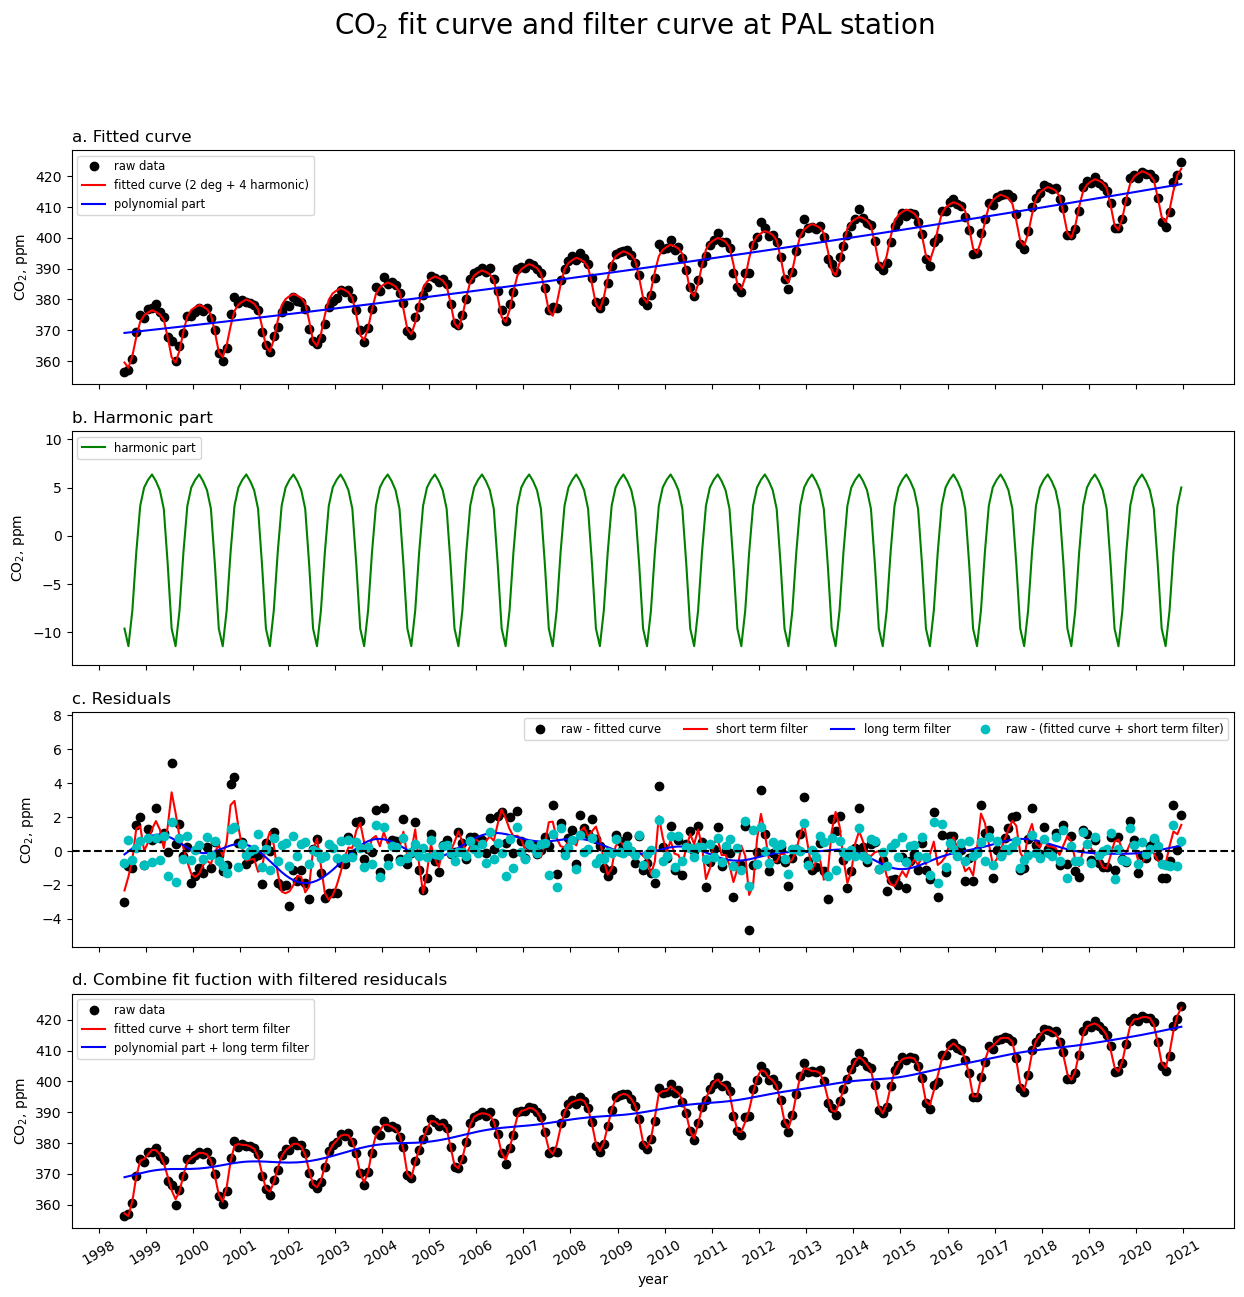

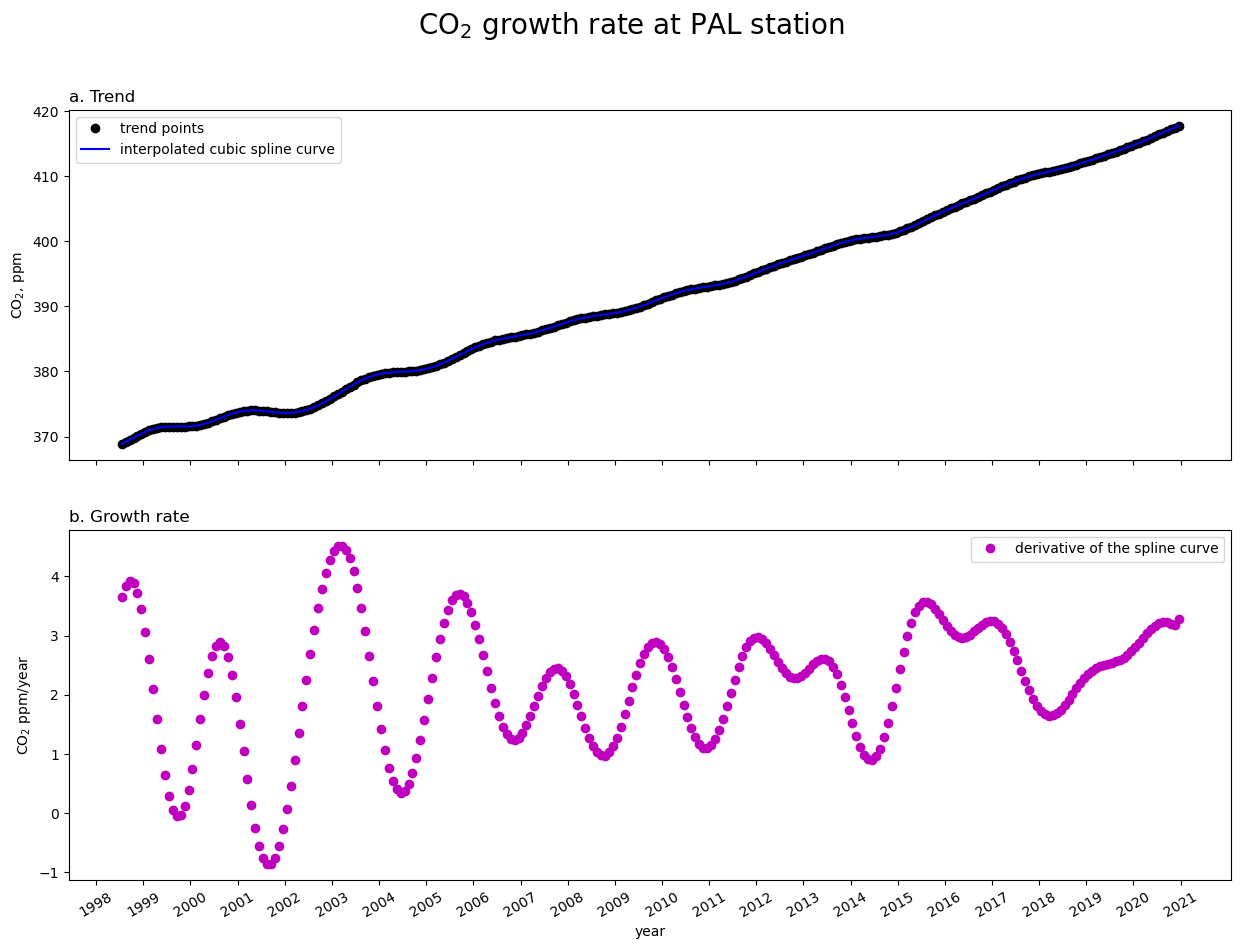

In [2]:
# set path of input and output
IN_PATH = "/data/flexpart/output/GAW/publish_zip/data/gaw_obs/input/"
OUT_PATH = "/data/flexpart/output/GAW/publish_zip/data/gaw_obs/output/"

# decide if plot, and which station
ifplot = 1
ifsaveplot=0
station_patten = "pal"
station = "PAL"
file = "pal667n1.dat"
# apply fit function and filter to CO2 data at each station
apply_fit_filter(IN_PATH, file, OUT_PATH, ifplot, ifsaveplot, station_patten, station, source="wdcgg", from2000=False);

## 3.2. Calculate global co2 average and uncertainty 

The result of semi-NOAA curve fitting and filter method is saved as xxx_fit_filter.csv for each station. 
Each xxx_fit_filter.csv file contains co2 mole fraction, polynomial part, harmonic part, residual part, smoothed residual, smoothed trend, and growth rate.
- GAW observations (139 stations) using semi-NOAA method (<font color=blue>cal_zonal_global_co2_gaw_seminoaa.ipynb</font>)
    - The xxx_fit_filter.csv are under /data/gaw_obs/output/co2obs/, xxx is named by station
    - The annual and monthly global co2 mean and growth rate (/data/gaw_obs/output/)<br>
        df_co2_annual_global_NH_SH_gaw_seminoaa.csv<br>
        df_co2_monthly_global_NH_SH_gaw_seminoaa.csv<br>
        df_co2rate_annual_global_NH_SH_gaw_seminoaa.csv<br>
        df_co2rate_monthly_global_NH_SH_gaw_seminoaa.csv
    - The uncertainty estimated by bootstrap method (/data/gaw_obs/output/)<br>
        bootstats_co2_annual_global_gaw_seminoaa.csv<br>
        bootstats_co2_monthly_global_gaw_seminoaa.csv<br>
        bootstats_co2rate_annual_global_gaw_seminoaa.csv<br>
        bootstats_co2rate_monthly_global_gaw_seminoaa.csv
- GAW observations (139 stations) using WDCGG method (<font color=blue>cal_zonal_global_co2_gaw_wdcgg.ipynb</font>)
    - The xxx_tiout.csv are under /data/outputWDCGG/output/co2obs/, get from WDCGG (Tsutsumi et al., 2009)
    - The annual and monthly global co2 mean and growth rate (/data/outputWDCGG/output/)<br>
        df_co2_annual_global_NH_SH_gaw_wdcgg.csv<br>
        df_co2_monthly_global_NH_SH_gaw_wdcgg.csv<br>
        df_co2rate_annual_global_NH_SH_gaw_wdcgg.csv<br>
        df_co2rate_monthly_global_NH_SH_gaw_wdcgg.csv
    - The uncertainty estimated by bootstrap method (/data/outputWDCGG/output/)<br>
        bootstats_co2_annual_global_gaw_wdcgg.csv<br>
        bootstats_co2_monthly_global_gaw_wdcgg.csv<br>
        bootstats_co2rate_annual_global_gaw_wdcgg.csv<br>
        bootstats_co2rate_monthly_global_gaw_wdcgg.csv
- CTE observations (230 stations) using semi-NOAA method (<font color=blue>cal_zonal_global_co2_ctracker_obs.ipynb</font>)
    - The xxx_fit_filter.csv are under /data/ctracker_obs/output/co2obs/
    - The annual and monthly global co2 mean and growth rate (/data/ctracker_obs/output/)<br>
        co2obs_co2_annual_global_NH_SH_ct2021_obs.csv<br>
        co2obs_co2_monthly_global_NH_SH_ct2021_obs.csv<br>
        co2obs_co2rate_annual_global_NH_SH_ct2021_obs.csv<br>
        co2obs_co2rate_monthly_global_NH_SH_ct2021_obs.csv
    - The uncertainty estimated by bootstrap method (/data/ctracker_obs/output/)<br>
        bootstats_co2_annual_global_cal_ct2021_obs.csv<br>
        bootstats_co2_monthly_global_cal_ct2021_obs.csv<br>
        bootstats_co2rate_annual_global_cal_ct2021_obs.csv<br>
        bootstats_co2rate_monthly_global_cal_ct2021_obs.csv
- CTE model output at stations (230 stations) using semi-NOAA method (<font color=blue>cal_zonal_global_co2_ctracker_model_sample.ipynb</font>)
    - The xxx_fit_filter.csv are under /data/ctracker_obs/output/co2obs/
    - The annual and monthly global co2 mean and growth rate (/data/ctracker_obs/output/)<br>
        co2model_co2_annual_global_NH_SH_ct2021_modelsample.csv<br>
        co2model_co2_monthly_global_NH_SH_ct2021_modelsample.csv<br>
        co2model_co2rate_annual_global_NH_SH_ct2021_modelsample.csv<br>
        co2model_co2rate_monthly_global_NH_SH_ct2021_modelsample.csv
    - The uncertainty estimated by bootstrap method (/data/ctracker_obs/output/)<br>
        bootstats_co2_annual_global_cal_ct2021_modelsample.csv<br>
        bootstats_co2_monthly_global_cal_ct2021_modelsample.csv<br>
        bootstats_co2rate_annual_global_cal_ct2021_modelsample.csv<br>
        bootstats_co2rate_monthly_global_cal_ct2021_modelsample.csv
- CTE model output (full global) using semi-NOAA method (<font color=blue>cal_zonal_global_co2_ctracker_model_global.ipynb</font>)
    - The fitting and filtered results for each grid cell (/data/ctracker_model/monthly_global/global_fitfilter/)<br>
        GCP2021_CT_cal_co2_2000_2020_monthly_fullglobal_level1-3.csv<br>
        GCP2021_CT_cal_co2_2000_2020_monthly_fullglobal_level1-25.csv<br>
        GCP2021_CT_cal_co2rate_2000_2020_monthly_fullglobal_level1-3.csv<br>
        GCP2021_CT_cal_co2rate_2000_2020_monthly_fullglobal_level1-25.csv
    - The annual and monthly global co2 mean and growth rate (/data/ctracker_obs/output/)<br>
        co2_annual_global_cte2021(level1-3)_seminoaa.csv<br>
        co2_monthly_global_cte2021(level1-3)_seminoaa.csv<br>
        co2rate_annual_global_cte2021(level1-3)_seminoaa.csv<br>
        co2rate_monthly_global_cte2021(level1-3)_seminoaa.csv<br>

Above results can also be found in the GAW_paper.zip.

Here is an example, calculate global co2 means and its growth rate and their conresponding uncertainty derived from GAW(semi-NOAA)

### 3.2.1.Calculate the global means and its growth rate by area-weighted averaging the zonal means over each latitudinal band (30°)

In [3]:
# Global co2 mole fraction
df_co2_cal = pd.read_csv(OUT_PATH + "df_co2_cal_gaw_obs_seminoaa.csv")

zonal_deg = 30

co2_monthly_cal, co2_annual_cal = weighted_zonal_mean(df_co2_cal,zonal_deg)
co2_annual_cal.index = ["global_cal","NH_cal","SH_cal"]
co2_monthly_cal.index = ["global_cal","NH_cal","SH_cal"]

co2_annual_cal

year,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
global_cal,323.109084,324.057835,325.600468,325.489889,329.572968,331.312788,332.585048,332.864588,332.883048,334.168094,...,390.958853,393.153742,395.836768,397.776550,400.125376,403.406998,405.655956,407.924054,410.557468,413.057819
NH_cal,323.109084,324.057835,325.600468,325.489889,329.572968,331.312788,332.585048,332.864588,333.602244,334.836800,...,393.058874,395.276953,397.972276,399.665904,402.034834,405.433162,407.855239,410.039784,412.617314,415.323066
SH_cal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,331.444656,332.830681,...,388.858832,391.030531,393.701259,395.887196,398.215919,401.380834,403.456672,405.808325,408.497622,410.792573


In [4]:
# Global co2 growth rate
df_co2rate_cal = pd.read_csv(OUT_PATH + "df_co2rate_cal_gaw_obs_seminoaa.csv")
zonal_deg = 30
co2rate_monthly, co2rate_annual = weighted_zonal_mean(df_co2rate_cal,zonal_deg)
co2rate_annual.index = ["global_cal","NH_cal","SH_cal"]
co2rate_monthly.index = ["global_cal","NH_cal","SH_cal"]
co2rate_annual

year,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
global_cal,0.919106,1.433012,0.899171,-0.670985,0.846775,1.768696,0.393862,0.835768,0.717050,2.248450,...,1.728333,2.738583,2.304208,1.91318,2.979655,2.948131,2.044944,2.502552,2.609040,2.604193
NH_cal,0.919106,1.433012,0.899171,-0.670985,0.846775,1.768696,0.393862,0.835768,0.682557,2.218987,...,1.614161,2.952922,2.177526,1.77884,3.046644,3.208344,1.919726,2.465289,2.557375,2.914197
SH_cal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.786038,2.307375,...,1.842505,2.524244,2.430889,2.04752,2.912665,2.687917,2.170161,2.539816,2.660704,2.294190


### 3.2.2. Estimate the uncertainties of global CO2 mean and its growth rate by using a bootstrap method

In [5]:
df_co2_cal = pd.read_csv(OUT_PATH + "df_co2_cal_gaw_obs_seminoaa.csv")
df_co2rate_cal = pd.read_csv(OUT_PATH + "df_co2rate_cal_gaw_obs_seminoaa.csv")

n_bootstraps=200
zonal_deg=30

# create 200 samples, and calculate global mean for each sample. df_boot records the combination of each sample.
lst_co2_annual_cal, lst_co2_monthly_cal, df_boot = calculate_boot_sample(df_co2_cal,n_bootstraps,zonal_deg,suffix="_cal")
lst_co2rate_annual_cal, lst_co2rate_monthly_cal, df_boot = calculate_boot_sample(df_co2rate_cal,n_bootstraps,zonal_deg,suffix="_cal")

# organize 200 global mean in one dataframe and calculate statistics (i.e. mean, sd, CI)
boot_co2_annual_global_cal = org_boot(lst_co2_annual_cal,zonal="global_cal")
boot_co2rate_annual_global_cal = org_boot(lst_co2rate_annual_cal,zonal="global_cal")
boot_co2_monthly_global_cal = org_boot(lst_co2_monthly_cal,zonal="global_cal")
boot_co2rate_monthly_global_cal = org_boot(lst_co2rate_monthly_cal,zonal="global_cal")
confidence = [0.68,0.95]
boot_stats_co2_annual_global_cal = get_boot_stats(boot_co2_annual_global_cal,confidence)
boot_stats_co2rate_annual_global_cal = get_boot_stats(boot_co2rate_annual_global_cal,confidence)
boot_stats_co2_monthly_global_cal = get_boot_stats(boot_co2_monthly_global_cal,confidence)
boot_stats_co2rate_monthly_global_cal = get_boot_stats(boot_co2rate_monthly_global_cal,confidence)
round(boot_stats_co2_annual_global_cal[range(1980,2021)],2)

year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
mean,339.13,340.31,341.12,342.67,344.39,345.70,347.16,349.07,351.47,353.13,...,390.96,393.15,395.83,397.77,400.12,403.40,405.65,407.92,410.55,413.06
std,0.39,0.24,0.19,0.24,0.26,0.22,0.14,0.15,0.13,0.15,...,0.12,0.14,0.12,0.10,0.10,0.11,0.10,0.10,0.13,0.16
CI_0.68,0.38,0.24,0.19,0.24,0.26,0.22,0.14,0.15,0.12,0.15,...,0.12,0.14,0.11,0.10,0.10,0.11,0.09,0.10,0.13,0.16
CI_0.95,0.76,0.47,0.37,0.47,0.51,0.43,0.27,0.29,0.25,0.29,...,0.24,0.27,0.23,0.19,0.19,0.21,0.19,0.19,0.26,0.31


## 3.3. Calculate atmospheric co2 mass
Atmospheric (from surface up to 200 km altitude) CO2 mass calculated from the CTE output as a function of air mass and CO2 concentration (see Supplement S1).
- Global monthly and annual atmospheric CO2 mass for 2000-2020 (<font color=blue>cal_co2mass_co2ppm_cte_global.ipynb</font>)<br>
    cte2021_co2mass_2000_2020_monthly.csv<br>
    cte2021_co2mass_2000_2020_annual.csv


In [6]:
CTE2021_cmass_2000_2020_annual = pd.read_csv("/data/flexpart/output/GAW/publish_zip/data/ctracker_model/monthly_global/global_fitfilter/" + "cte2021_co2mass_2000_2020_annual.csv",index_col=0)
CTE2021_cmass_2000_2020_annual

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
global_cmass,786.892563,789.458517,793.471639,798.959847,803.124352,807.405132,812.120687,815.672329,819.859390,822.981750,...,832.457297,836.859661,842.145796,846.398422,850.762424,857.251245,862.602828,867.619905,872.611084,877.883228
NH_cmass,393.542438,394.699783,396.664259,399.447797,401.543423,403.716476,406.200863,407.824089,410.094424,411.508888,...,416.368158,418.771513,421.418637,423.386638,425.622726,428.964512,431.690864,434.127669,436.597184,439.250163
SH_cmass,393.350126,394.758734,396.807380,399.512050,401.580929,403.688657,405.919824,407.848240,409.764966,411.472862,...,416.089139,418.088149,420.727160,423.011785,425.139698,428.286733,430.911964,433.492236,436.013900,438.633065


# 4.Results
The key Results in the paper are attachted here (if readers are interested in ploting result, please find the code in <font color=blue>plot_results.ipynb</font>) 

<img src="../image/new_figure2.png" width="900" style="float:left"><br clear="all" />
Figure 2. Comparison of globally averaged CO2 mole fraction (a) and its GATM (b) from 1980 to 2021. Panel a shows the global monthly CO2 from 139 GAW sites (estimated from observations only) and those from 230 sites used in CTE (either from observations or model output) differs from NOAA estimates based on 43 MBL sites. Red and blue lines show the CO2 derived from the GAW observations using semi-NOAA and WDCGG method without extrapolation, respectively. Green and orange lines show the CO2 derived from observations and model output at the 230 sites assimilated by CTE using semi-NOAA method, respectively. The dashed lines show the mean over the available period. Panel b compares the global CO2 growth rate derived from GAW observations using semi-NOAA (red line) and WDCGG method without extrapolation (blue line), CTE observations (green line) and model output (orange line) using semi-NOAA method, and the NOAA analysis (black line). The shadow area shows the uncertainty as 68% confidence interval obtained by the bootstrap analysis.

<img src="../image/new_figure3_trend.png" width="900" style="float:left"><br clear="all" />
Figure 3. Trend analysis of the global CO2 growth rate from 1980 to 2021. Panel a shows the trends of CO2 growth rate for the GAW network (red line), the CTE network (green line) and the NOAA network (black line) during the whole period 1980-2020, the CO2 growth rate is derived from GAW(semi-NOAA), CTE obs(semi-NOAA) and NOAA analysis (Figure 2b). Panel b shows the trend of CO2 growth rate for each month during 1980-2020, calculated as the derivative of the growth rate. The grey bands mark the period of three strong El Niño events, i.e 1987-1988, 1997-1998 and 2014-2016.

<img src="../image/new_figure4.png" width="900" style="float:left"><br clear="all" />
Figure 4. Global vertical profile of CO2 mole fraction derived from CTE model output. Panel a shows the vertical profile in 2020. Panel b shows the difference of the vertical profile between 2001 and 2020. Panel c shows the annual mean vertical profile from 2001 to 2020, the dots mark CTE vertical level heights and lines are the linear interpolation between the heights. 

<img src="../image/new_figure5_with IAV2.png" width="900" style="float:left"><br clear="all" />
Figure 5. Relationship between the monthly surface CO2 and atmospheric CO2 mass. The atmospheric CO2 mass calculated from the 3D CTE output. In panel a, the monthly surface CO2 derived from the CTE_output (semi-NOAA), GAW (semi-NOAA) and NOAA analysis, presented as blue, red and green dots, respectively. Panel b compare the corresponding interannual variability (IAV) of the atmospheric CO2 mass and the surface CO2. The IAV is calculated as the anomaly departure from a quadratic trend. 

<img src="../image/new_figure6.png" width="900" style="float:left"><br clear="all" />
Figure 6 Annual absolute change and interannual variability of global CO2 mole fraction derived from different data (CTE model, GAW observation and NOAA observation) and analysis methods (semi-NOAA method, WDCGG method and NOAA method) for 2000-2020. Panel a shows the annual absolute change which is the difference between annal mean. Averages over 2001-2010 and 2011-2020 are also shown. Panel b shows the IAV which is calculated as the anomaly departure from a quadratic trend.